# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of surveys conducted in 1998
 * "Wave 2" of surveys conducted in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected|
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean, standard error, and the values at the 5th and 95th percentiles) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

*Note:* For this and subsequent problems, you will need to be careful in how you deal with missing (NULL) values. You should not blindly drop rows and columns where any data field is missing.  For instance, in calculating the average `hohwag`, you should average the `hohwag` values from all households that report a value (even if the household does not have a recorded `age` value, for example). 

In [1]:
import pandas as pd
path_progresa_data ="/Users/larsleopold/Desktop/info251/applied-machine-learning/Problem-sets/ps2/progresa_sample.csv"
progresa_data = pd.read_csv(path_progresa_data)
progresa_df = pd.DataFrame(progresa_data)

display(progresa_df.head())

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


In [ ]:
# your code here
import pandas as pd

path_progresa_data ="/Users/larsleopold/Desktop/info251/applied-machine-learning/Problem-sets/ps2/progresa_sample.csv"
progresa_data = pd.read_csv(path_progresa_data)
progresa_df = pd.DataFrame(progresa_data)

#changing the variables to be 1 if poor and 1 if treatment, i assume basal means they get treatment 
progresa_df['poor'] = progresa_df['poor'].apply(lambda x: 1 if x == 'pobre' else 0)
progresa_df['progresa'] = progresa_df["progresa"].apply(lambda x: 1 if x == 'basal' else 0)
                                               
demographic_variables_df = progresa_df.drop(columns=['year', 'folnum', 'village']) 
statistics_list = []

for col in demographic_variables_df.columns:
    mean = demographic_variables_df[col].mean()
    standard_error = demographic_variables_df[col].std()
    pr_5th = demographic_variables_df[col].quantile(0.05)
    pr_9th = demographic_variables_df[col].quantile(0.95)
    
    statistics_list.append({
        'Variable' : col,
        'Mean' : mean,
        'Standard error': standard_error,
        '5th precentile': pr_5th,
        '95th precentile' : pr_9th

    })


stats_table = pd.DataFrame(statistics_list)
stats_table = stats_table.round(3)
stats_table = stats_table.sort_values(by = "Variable")
display(stats_table)



47560
47560


,Variable,Mean,Standard error,5th precentile,95th precentile
15,age,11.366,3.168,7.000,16.000
7,dist_cap,147.674,76.063,43.886,289.016
2,dist_sec,2.419,2.234,0.000,5.875
5,fam_n,7.216,2.353,4.000,11.000
4,grc,3.964,2.499,0.000,8.000
16,grc97,3.705,2.572,0.000,8.000
14,hohage,44.437,11.620,29.000,66.000
10,hohedu,2.768,2.656,0.000,7.000
13,hohsex,0.925,0.263,0.000,1.000
11,hohwag,586.985,788.134,0.000,1440.000


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?  Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):


| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|

 *Hint:* Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 from poor households (i.e., poor=='pobre').


In [3]:
# your code here
from scipy import stats

data_97_and_poor = progresa_df[(progresa_df["poor"] == 1) 
                                            & (progresa_df["year"] == 97)]

data_97_and_poor = data_97_and_poor.drop(columns=["grc97", "year", "poor", "sc97"])
T_group = data_97_and_poor[data_97_and_poor["progresa"] == 1]
C_group = data_97_and_poor[data_97_and_poor["progresa"] == 0]

characteristics_list = []

def avarage_value(df1, df2, list):
    for col in df1:
        mean_value_df1 = df1[col].mean()
        mean_value_df2 = df2[col].mean()
        t_stat, p_value = stats.ttest_ind(df1[col].dropna(), df2[col].dropna())
        list.append({
            'Variable Name' : col,
            "Average value (Treatmen villages)" : mean_value_df1,
            "Average value (Control villages)" : mean_value_df2,
            "Difference (Treat - Control)" : (mean_value_df1 - mean_value_df2) ,
            "p-value" : p_value,
        })
    return list

charactherstics = avarage_value(T_group, C_group, characteristics_list)
charactherstics_table = pd.DataFrame(charactherstics)

charactherstics_table = charactherstics_table.sort_values(by = "Variable Name")
charactherstics_table = charactherstics_table.round(4)

display(charactherstics_table)


,Variable Name,Average value (Treatmen villages),Average value (Control villages),Difference (Treat - Control),p-value
14,age,10.7170,10.7420,-0.0250,0.4786
7,dist_cap,150.8291,153.7697,-2.9407,0.0008
2,dist_sec,2.4531,2.5077,-0.0545,0.0357
5,fam_n,7.2813,7.3025,-0.0211,0.4271
16,folnum,19321.1682,19272.8443,48.3239,0.7031
4,grc,3.5316,3.5430,-0.0115,0.6890
13,hohage,43.6488,44.2769,-0.6281,0.0000
9,hohedu,2.6631,2.5903,0.0728,0.0111
12,hohsex,0.9247,0.9229,0.0017,0.5712
10,hohwag,544.3395,573.1636,-28.8240,0.0003


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages at baseline? 
* B: Why does it matter if there are differences at baseline? 
* C: What does this imply about how to measure the impact of the treatment?

#### your interperation here

A. There are some variables that have statistifall significant differences between treatment and control, if we have the typical threshold for p-value at 0.05(e.g., distance to the capital, age of head of household, years of schooling of head of household,etc) But many of the other variables dont have statistically significant differeneces. 

B. If the treatment and control groups differ systematically before the intervention, any simple comparison of outcomes after the program might effect the effect of the program with pre‐existing differences. In other words, we could be measuring the impact of already unequal starting points rather than the effect of the treatment itself. This is also important when one makes the key ideintifyig assumtion. 

C. Because some variables differ between treatment and control at the outset, we may need an evaluation strategy that accounts for these baseline imbalances.


### 1.4 Graphical exploration

Visualize the distribution of village enrollment rates among poor households in treated villages, before and after treatment.

Specifically, for each treated village:

- First, calculate the average rate of enrollment of poor households in 1997.
- Then, compute the average rate of enrollment of poor households in 1998.
- Create a graph showing the distribution of these average enrollment rates (one histogram for 1997 and one histogram for 1998). On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). 
- Ensure that your graph is well formatted / publication quality -- add a title, x-axis labels, a legend, and any other elements as necessary.

Then, answer the following questions:
- Does there appear to be a difference between the average enrolment rates in 1997 and 1998? Is this difference statistically significant?

Now, repeat the process, and generate a second set of graphs comparing the distributions for non-poor households, before and after treatment.

- Does there appear to be a difference between the average enrolment rates in 1997 and 1998? Is this difference statistically significant?


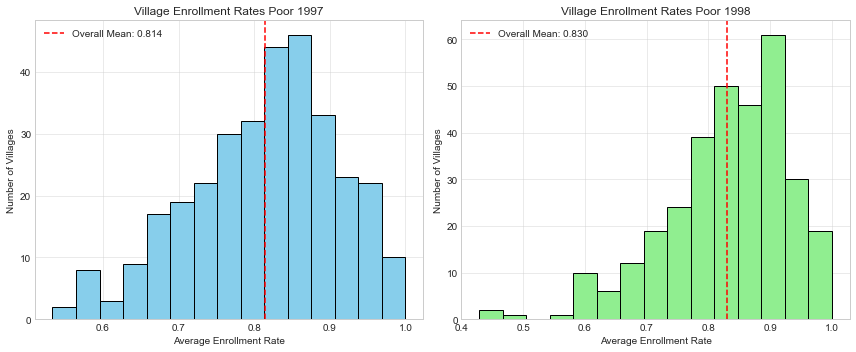

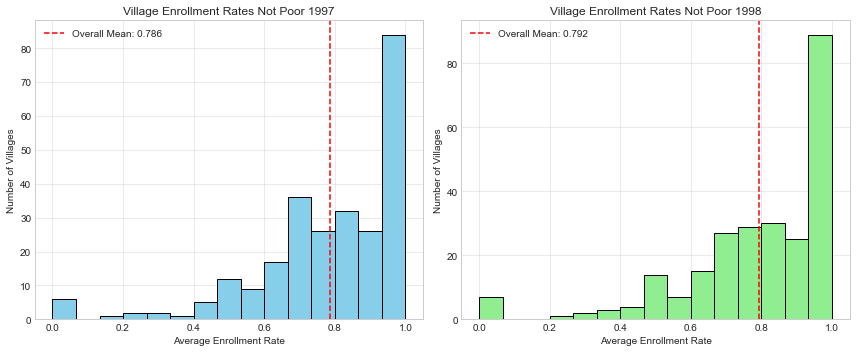

In [19]:
# Your code here
import matplotlib.pyplot as plt
treated_poor_1997 = progresa_df[(progresa_df['progresa'] == 1) 
                                & (progresa_df['poor'] == 1) 
                                & (progresa_df['year'] == 97)]

treated_poor_1998 = progresa_df[(progresa_df['progresa'] == 1) 
                                & (progresa_df['poor'] == 1) 
                                & (progresa_df['year'] == 98)]

village_enroll_rate_1997 = treated_poor_1997.groupby('village')['sc'].mean().reset_index()
village_enroll_rate_1998 = treated_poor_1998.groupby('village')['sc'].mean().reset_index()

overall_mean_1997 = village_enroll_rate_1997['sc'].mean()
overall_mean_1998 = village_enroll_rate_1998['sc'].mean()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(village_enroll_rate_1997['sc'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.axvline(overall_mean_1997, color='red', linestyle='dashed', linewidth=1.5, 
    label=f'Overall Mean: {overall_mean_1997:.3f}')
plt.title('Village Enrollment Rates Poor 1997')
plt.xlabel('Average Enrollment Rate')
plt.ylabel('Number of Villages')
plt.grid(alpha = 0.5)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(village_enroll_rate_1998['sc'].dropna(), bins=15, color='lightgreen', edgecolor='black')
plt.axvline(overall_mean_1998, color='red', linestyle='dashed', linewidth=1.5, 
    label=f'Overall Mean: {overall_mean_1998:.3f}')
plt.title('Village Enrollment Rates Poor 1998')
plt.xlabel('Average Enrollment Rate')
plt.ylabel('Number of Villages')
plt.grid(alpha = 0.5)
plt.legend()

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

treated_not_poor_1997 = progresa_df[(progresa_df['progresa'] == 1) 
                                & (progresa_df['poor'] == 0) 
                                & (progresa_df['year'] == 97)]

treated_not_poor_1998 = progresa_df[(progresa_df['progresa'] == 1) 
                                & (progresa_df['poor'] == 0) 
                                & (progresa_df['year'] == 98)]

village_enroll_rate_1997_not_poor = treated_not_poor_1997.groupby('village')['sc'].mean().reset_index()
village_enroll_rate_1998_not_poor = treated_not_poor_1998.groupby('village')['sc'].mean().reset_index()

overall_mean_1997_not_poor = village_enroll_rate_1997_not_poor['sc'].mean()
overall_mean_1998_not_poor = village_enroll_rate_1998_not_poor['sc'].mean()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(village_enroll_rate_1997_not_poor['sc'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.axvline(overall_mean_1997_not_poor, color='red', linestyle='dashed', linewidth=1.5, 
    label=f'Overall Mean: {overall_mean_1997_not_poor:.3f}')
plt.title('Village Enrollment Rates Not Poor 1997')
plt.xlabel('Average Enrollment Rate')
plt.ylabel('Number of Villages')
plt.grid(alpha = 0.5)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(village_enroll_rate_1998_not_poor['sc'].dropna(), bins=15, color='lightgreen', edgecolor='black')
plt.axvline(overall_mean_1998_not_poor, color='red', linestyle='dashed', linewidth=1.5, 
    label=f'Overall Mean: {overall_mean_1998_not_poor:.3f}')
plt.title('Village Enrollment Rates Not Poor 1998')
plt.xlabel('Average Enrollment Rate')
plt.ylabel('Number of Villages')
plt.grid(alpha = 0.5)
plt.legend()

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on school enrollment rates among the poor (those with poor=='pobre'), since only the poor were eligible to receive PROGRESA assistance, and since a primary objective of the program was to increase school enrollment.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [2]:
# your code here

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that a person with no technical background could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [3]:
# your code here

### 2.3 Multiple Regression

Re-run the above regression, but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
* Interpet the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

In [4]:
# your code here

* Including control variables decreases the estimated coefficient on the treatment effect
* There is very little effect on the standard error
* Controlling for other observable factors decreased the estimated treatment effect - or put differently, without controlling for other factors, the estimates of the treatment effectin 2.2 were likely *over*-estimates of the true treatment effect. This is likely due to the fact that other factors were correlated with both treatment and outcomes (as we saw in 1.2).
* The -0.0112 coefficient associated with dist_sec indicates that with a unit increase in dist_sec the enrollment of poor on average decreases by 0.11%, holding all the other variables constant. This does not indicate a causal effect since dist_sec is the control variable which isn't randomly assigned and is only added to the regression to account for other systematic differences in the treatment and control groups.

### 2.4 Multiple Regression Revisited

For the same set of control variables that you used in 2.3, carry out the following alternative estimation procedure. 

* First, regress the 1998 enrollment of the poor on the control variables, **without including the treatment assignment.** 
* Second, use this model to obtain predicted values of the 1998 enrollment for each child in the sample used to estimate the model in step 1. 
* Third, compute a new value for each child, which is the difference between the actual 1998 enrollment and the predicted enrollment value from step 2. 
* Finally, regress the difference from step 3 on treatment assignment.

Compare the point estimate and the standard error on treatment assignment that you obtained in step 4 to their analogues in 2.3. Explain the results.

In [5]:
# your code here

The alternative estimation procedure yields very similar results as the multiple regression estimated in 2.3. We can think of multiple regression as providing an estimate of the linear relationssip between treatment assignment and the residual variance of the outcome that is not explained by the controls. 

### 2.5 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. 

Display your results in a 2x2 table where the rows are Control/Treatment and the columns are 1997/1998. 

* What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [6]:
# your code here

### 2.6 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences, for the poor households. Do this (i) first without including any control variables; and then (ii) do it a second time including at least 5 control variables. 

* What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?
* How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
* What is the counterfactual assumption underlying regression (ii)? 

In [7]:
## your code here

### 2.7 Heterogeneous Treatment Effects

Thus far, we have been calculating the average treatment effect -- implicitly assuming that the impacts of progresa are homogeneous (i.e similar for everyone in the treatment group).

However, treatment effects might vary by demographics, socio-economic status, or other covariates. In this exercise, we'll think a little more carefully about such variation in treatment effects, the aim being to arrive at a more nuanced understanding of who benefits most from progresa. (More formally, we are now thinking of *conditional* average treatment effects -- a concept that you will revisit towards the end of the semester).

Repeat your analysis in 2.5 / 2.6, instead focusing on whether the impacts of Progresa on school enrolment differ by gender.

1. Begin by estimating the average treatment effects of the program for male children in poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among male children in poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among male children in poor households in control villages.
    - Report your results in a 2 X 2 table where the rows are Control / Treatment, and the columns are 1997 / 1998.
    - Report your estimate of the causal impact of progresa on school enrolment for male children.

2. Repeat the process for female children in poor households using data from 1997 and 1998.
    - Report the results in a 2 X 2 table where the rows are Control / Treatment, and the columns are 1997 / 1998.
    - Report your estimate of the causal impact of progresa on school enrolment for male children.

3. Do the effects of Progresa differ by gender?
    - Begin by examining manually examining the differences in the causal impact of progresa on school enrolment for male and female children (from Steps 1 and 2 above ).  
    - Then, extend the double difference regression you ran in 2.6 (without including any control variables) to directly estimate the differential impact. (Hint: the double difference / diff-in-diff regression you have seen in class and lab sessions allow you to compare two groups (treated and control) across two time periods (pre and post). Now, within this setup, you have an additional comparison to make – between male and female children. What terms do you need to add to the regression in 2.6 in order to allow for this third axis of comparison?)
    - Report your findings – do the effects of Progresa differ by gender? 



In [ ]:
# Your code here

### 2.8 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 

### 2.9 Spillover effects [EXTRA CREDIT]: 


Thus far, we have focused on the impact of PROGRESA on the school enrollment of poor households. Repeat your analysis in 2.5, instead focusing on (a) the impact of PROGRESA on the school enrollment of non-poor households, and (b) the impact ofo PROGRESA on *other outcomes* of poor households that might plausibly have been affected by the PROGRESA program.
* Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?
* Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.
* Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households? 

In [8]:
# Your code here